In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid ,relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

np.set_printoptions(precision = 2)

In [70]:
def load_data():
    df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
    labels = df.label.values
    df = df.drop('label' , axis = 1)
    images = df.values.reshape(df.shape[0], -1)
    return images, labels.reshape(-1, 1)
    

In [46]:
X, y = load_data()

In [47]:
print ('The first element of X is: ', X[0])

The first element of X is:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   

In [48]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  1
The last element of y is:  9


In [49]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (42000, 784)
The shape of y is: (42000, 1)


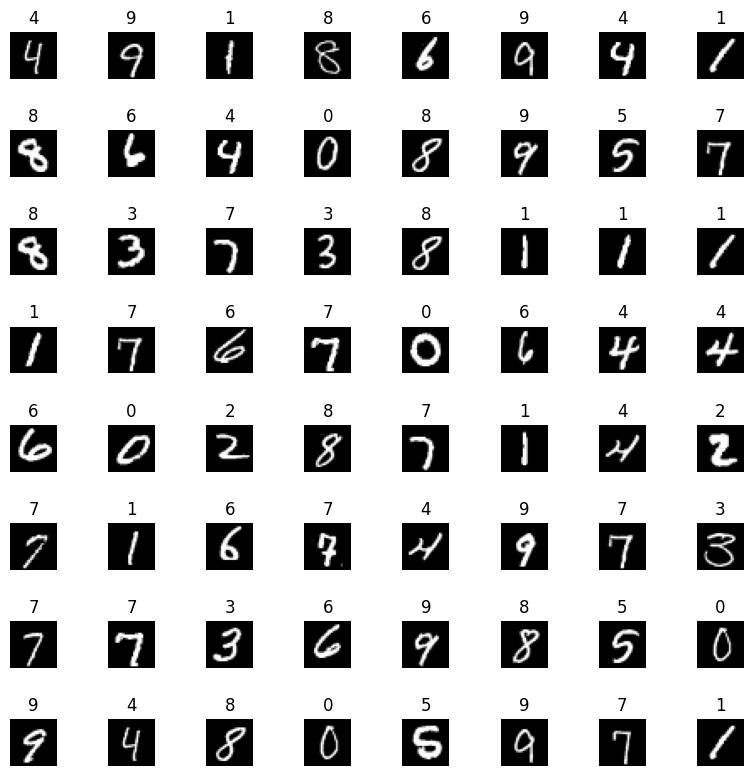

In [58]:
fig, axs = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout()
for i , ax in enumerate(axs.flatten()):
    random_index = np.random.randint(100)
    image = X[random_index].reshape((28,28))
    ax.imshow(image, cmap  = "gray")
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [231]:
model = Sequential(
    [
    tf.keras.layers.Input(shape= (784,)),
    Dense(25, activation = 'sigmoid'),
    Dense(15, activation = 'sigmoid'),
    Dense(10, activation = 'linear')
    ]
)

In [232]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 25)                19625     
                                                                 
 dense_25 (Dense)            (None, 15)                390       
                                                                 
 dense_26 (Dense)            (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [233]:
## The parameters that we have 
L1_num_params = 784 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  19625 , L2 params =  390 ,  L3 params =  16


In [74]:
##layers their weights and the shape
[layer1, layer2, layer3] = model.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [75]:
print(model.layers[2].weights)

[<tf.Variable 'dense_8/kernel:0' shape=(15, 10) dtype=float32, numpy=
array([[-0.08071622,  0.38939378,  0.31957576,  0.41278294,  0.2717168 ,
        -0.4446922 ,  0.3785769 ,  0.32840124,  0.44275525,  0.29736784],
       [-0.20001712,  0.28275785, -0.36161178,  0.11660478, -0.20098564,
        -0.32947385, -0.36619925,  0.17279169,  0.08955863, -0.31942078],
       [-0.28327316,  0.07495829,  0.04778871,  0.32087323, -0.4565734 ,
        -0.4235578 ,  0.25453094,  0.35845867, -0.4782043 , -0.4842616 ],
       [ 0.32980147,  0.20103213, -0.28512597,  0.37048844, -0.43477908,
         0.17558953,  0.2424297 ,  0.1816934 ,  0.3535911 , -0.41943377],
       [-0.37780926, -0.27832854, -0.01329905, -0.05576432, -0.47407857,
         0.23761693, -0.16838735, -0.05424696, -0.09093547,  0.10294858],
       [-0.15352082, -0.42806256, -0.4394366 ,  0.26197967,  0.06673869,
         0.04028925, -0.06495523, -0.18911949,  0.05443957,  0.47634426],
       [-0.13195613,  0.27528176, -0.30292758,  

In [235]:
## tranning the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ["accuracy"], optimizer = tf.keras.optimizers.Adam(0.001))
history = model.fit(X, y, epochs= 20) 

Epoch 1/20
1313/1313 [==============================] - 3s 2ms/step - loss: 1.4195 - accuracy: 0.6382
Epoch 2/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7314 - accuracy: 0.8060
Epoch 3/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5754 - accuracy: 0.8364
Epoch 4/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4893 - accuracy: 0.8545
Epoch 5/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4414 - accuracy: 0.8664
Epoch 6/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4522 - accuracy: 0.8659
Epoch 7/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4322 - accuracy: 0.8686
Epoch 8/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4136 - accuracy: 0.8722
Epoch 9/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4151 - accuracy: 0.8717
Epoch 10/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.406

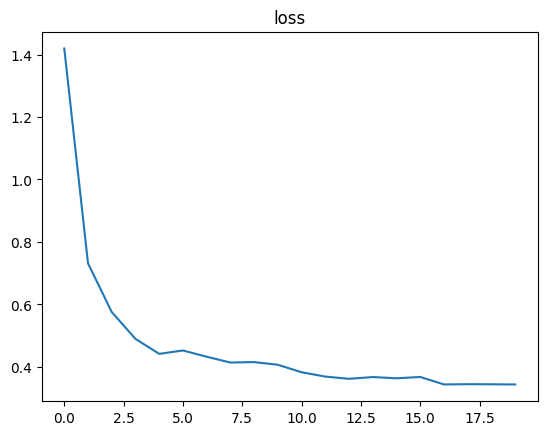

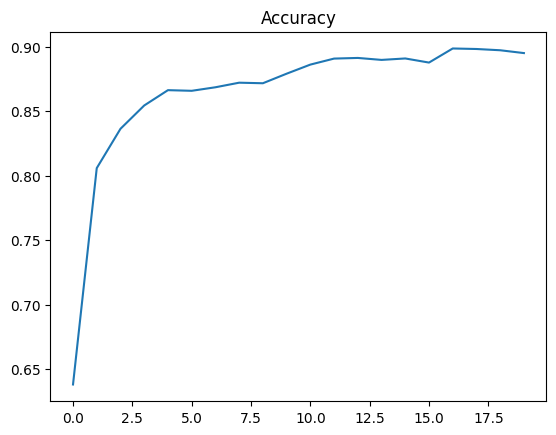

In [236]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.show()

In [84]:
prediction = model.predict(X[0].reshape(1,784))   
print(f" predicting a zero: {np.argmax(prediction)}") # a zero
prediction = model.predict(X[-1].reshape(1,784))   
print(f" predicting a one:  {np.argmax(prediction)}") # a nine

1/1 [==============================] - 0s 17ms/step
 predicting a zero: 1
1/1 [==============================] - 0s 16ms/step
 predicting a one:  9


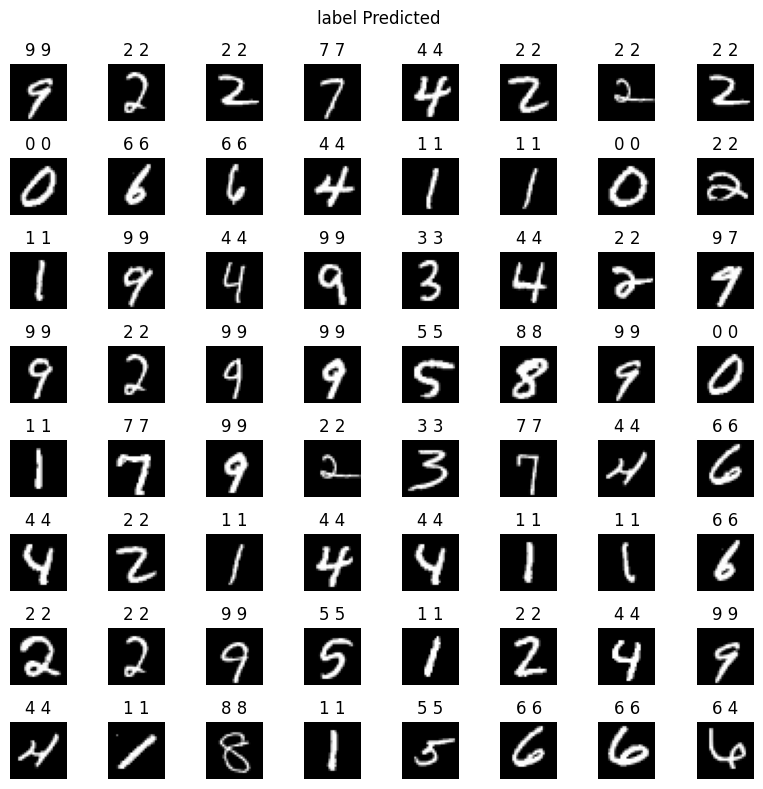

In [88]:
fig, axs = plt.subplots(8,8, figsize = (8,8))
for i , ax in enumerate(axs.flatten()):
    random_index = np.random.randint(100)
    image = X[random_index].reshape((28,28))
    pred = model.predict(X[random_index].reshape(1,784), verbose=0)
    ax.imshow(image, cmap  = "gray")
    ax.set_title(f"{y[random_index,0]} {np.argmax(pred)}")
    ax.set_axis_off()
fig.suptitle("label Predicted ")
fig.tight_layout()
plt.show()

# Implementation from Scratch

In [141]:
def sigmoid(x):
    clipped_x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

In [156]:
def my_dense(a_in, W, b, g):
    a_out = g(np.matmul(a_in,W) + b)
    return a_out

In [134]:
##check for my_dense
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]]


In [136]:
## Sequential model from scratch
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return a3

In [137]:
[layer1, layer2,layer3] = model.layers
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [157]:
# make predictions using the Sequential function made using numpy
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
yhat = np.argmax(prediction)
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
yhat = np.argmax(prediction)
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  1  label=  1
yhat =  6  label=  6


/tmp/ipykernel_42/2053989558.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


/tmp/ipykernel_42/2053989558.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


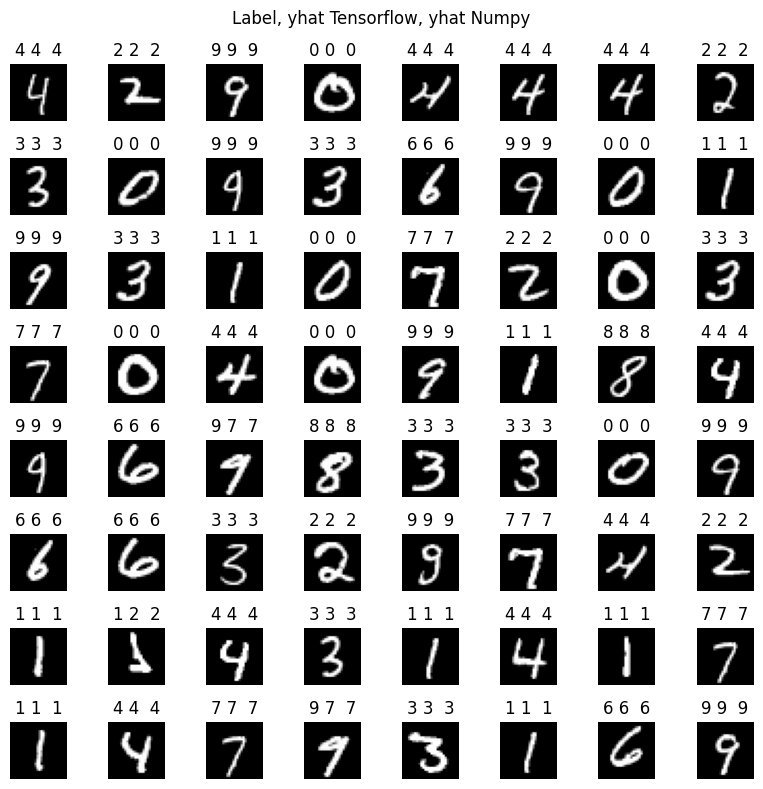

In [150]:
fig, axs = plt.subplots(8,8, figsize = (8,8))
for i , ax in enumerate(axs.flatten()):
    random_index = np.random.randint(100)
    image = X[random_index].reshape((28,28))
    pred = model.predict(X[random_index].reshape(1,784), verbose=0)
    pred_numpy = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    ax.imshow(image, cmap  = "gray")
    ax.set_title(f"{y[random_index,0]} {np.argmax(pred)}  {np.argmax(pred_numpy)}")
    ax.set_axis_off()
fig.suptitle("Label, yhat Tensorflow, yhat Numpy")
fig.tight_layout()
plt.show()

In [160]:
Prediction = my_sequential(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

/tmp/ipykernel_42/2053989558.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


(42000, 10)

In [165]:
Yhat =  np.argmax(Prediction, axis = 1)
print("predict a one: ",Yhat[0], "predict a six: ", Yhat[500])

predict a one:  1 predict a six:  6


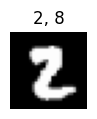

In [176]:
fig = plt.figure(figsize=(1, 1))
Yhat= Yhat.reshape(-1,1)
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((28,28))
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index,0]}")
plt.axis('off')
plt.show()

In [250]:
def display_digit(image,index):
    X_reshaped = image.reshape((28,28))
    plt.imshow(X_reshaped, cmap='gray')
    plt.title(f"{y[index,0]}")
    plt.axis('off')
    plt.show()

In [216]:
def my_softmax(z):  
    ez = np.exp(z)
    a = ez / np.sum(ez)
    return a

In [227]:
tf.random.set_seed(1234)  
model = Sequential(
    [ 
        tf.keras.Input(shape=(784,)),
        Dense(25,activation="relu"),
        Dense(15,activation="relu"),
        Dense(10,activation="linear")
    ], name = "my_model" 
)

In [220]:
model.summary()

Model: "Last Layer Linear"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 25)                19625     
                                                                 
 dense_13 (Dense)            (None, 15)                390       
                                                                 
 dense_14 (Dense)            (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [221]:
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [228]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
1313/1313 [==============================] - 2s 1ms/step - loss: 2.1560
Epoch 2/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.8420
Epoch 3/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6625
Epoch 4/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5886
Epoch 5/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5477
Epoch 6/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5049
Epoch 7/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4776
Epoch 8/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4326
Epoch 9/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3993
Epoch 10/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3760
Epoch 11/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3601
Epoch 12/40
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3362
E

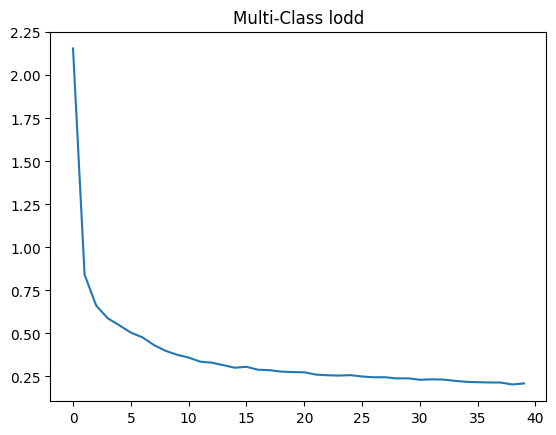

In [230]:
plt.plot(history.history['loss'])
plt.title("Multi-Class loss")
plt.show()

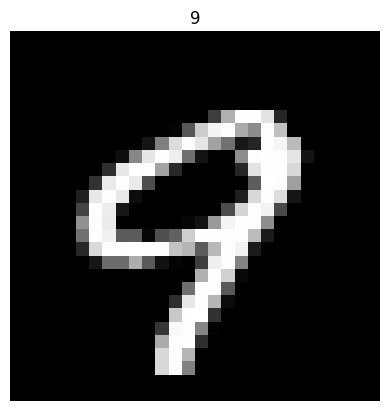

 predicting a Two: 
[[-5.89 -5.83 -3.47 -1.63  0.16 -3.2  -8.19  0.88 -1.94  4.28]]
 Largest Prediction index: 9


In [251]:
index = 100
image_of_two = X[index]
display_digit(image_of_two,index)

prediction = model.predict(image_of_two.reshape(1,784),verbose = 0)  # prediction
print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [252]:
prediction_p = tf.nn.softmax(prediction)
print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[3.66e-05 3.87e-05 4.11e-04 2.59e-03 1.55e-02 5.36e-04 3.64e-06 3.17e-02
  1.89e-03 9.47e-01]]
Total of predictions: 1.000


In [257]:
prediction_p = my_softmax(prediction)
print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[3.66e-05 3.87e-05 4.11e-04 2.59e-03 1.55e-02 5.36e-04 3.64e-06 3.17e-02
  1.89e-03 9.47e-01]]
Total of predictions: 1.000


In [256]:
yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 9


# Evaluating A learning algorithm
Let's start with a simple data set to understand and then will apply to the above digit example

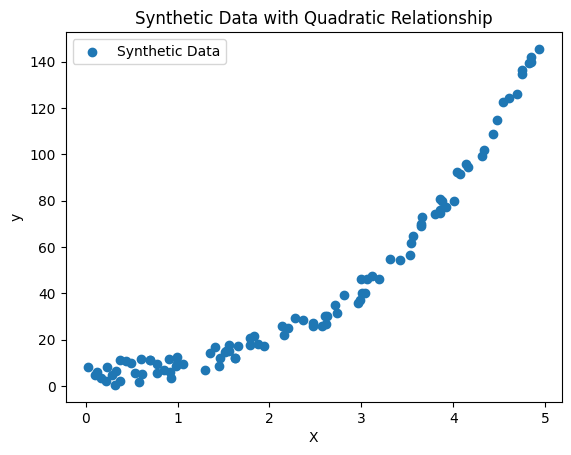

In [40]:
##synthetic Data set and its plot
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 2 * X.squeeze() + 0.5 * X.squeeze()**2 + np.random.randn(100) +X.squeeze()**3 
y = y.reshape(-1,1)
y = y + np.random.random(X.shape) * 10
plt.scatter(X, y, label='Synthetic Data')
plt.title('Synthetic Data with Quadratic Relationship')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (100, 1) y.shape (100, 1)
X_train.shape (67, 1) y_train.shape (67, 1)
X_test.shape (33, 1) y_test.shape (33, 1)


In [4]:
def eval_mse(y,yhat):
    return  np.sum(np.square(np.subtract(y,yhat)))/(2*len(y))

In [50]:
class lin_model:
    def __init__(self,degree,regularization=None,lambda_=None):
        self.degree = degree     
        self.poly = PolynomialFeatures(self.degree)
        self.regularization = regularization
        self.lambda_ = lambda_
    def fit(self, X, y):
        X_poly = self.poly.fit_transform(X)
        if self.regularization is None:
            self.model = LinearRegression().fit(X_poly, y)
        else:
            self.model = Ridge(alpha=self.lambda_).fit(X_poly, y)
            
    def predict(self,X):
        return self.model.predict(self.poly.transform(X))
    def mse(self,t,p):
        return eval_mse(t,p)

In [6]:
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

In [7]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 3.96, test err 5.02


In [26]:
def plt_train_test(X_train, y_train, x, y_pred):
    plt.scatter(X_train, y_train, label='Synthetic Data')
    plt.plot(x, y_pred, label='Prediction curve', color = "red")
    plt.title('Synthetic Data points and prediction Curve')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

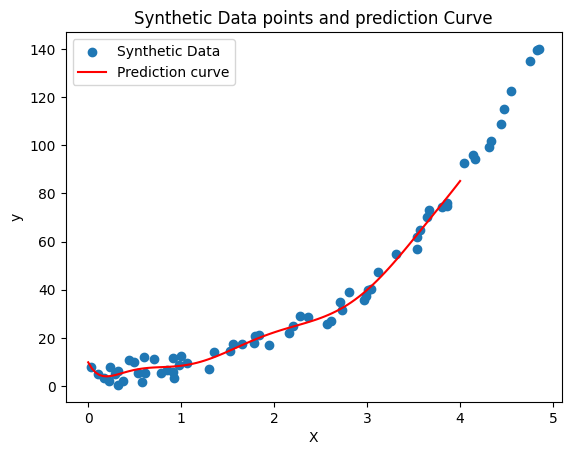

In [12]:
#prediction curve for degree 10 as can be seen it is overfitting 
x = np.linspace(0,int(X.max()),100).reshape(-1,1) 
y_pred = lmodel.predict(x).reshape(-1,1)
plt_train_test(X_train, y_train,x, y_pred)

In [5]:
print("X.shape", X.shape, "y.shape", y.shape)
#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (100, 1) y.shape (100, 1)
X_train.shape (60, 1) y_train.shape (60, 1)
X_cv.shape (20, 1) y_cv.shape (20, 1)
X_test.shape (20, 1) y_test.shape (20, 1)


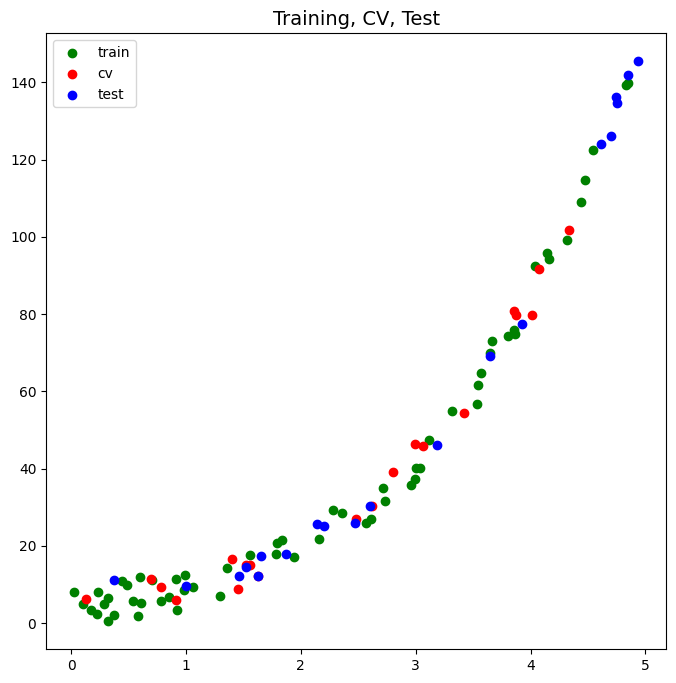

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X_train, y_train, color = "green",           label="train")
ax.scatter(X_cv, y_cv,       color = "red", label="cv")
ax.scatter(X_test, y_test,   color = 'blue',   label="test")
ax.set_title("Training, CV, Test",fontsize = 14)
ax.legend(loc='upper left')
plt.show()

In [63]:
##Doing cv to find the best value for degree
max_acorrdegree = 9
err_train = np.zeros(max_degree)
err_cv = np.zeros(max_degree)
x = np.linspace(0, int(max(X_train)), 100).reshape(-1, 1)
y_pred = np.zeros((100, max_degree))

for degree in range(max_degree):
    lmodel = lin_model(degree)
    lmodel.fit(X_train, y_train)
    
    yhat_train = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat_train)
    
    yhat_cv = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat_cv)
    
    y_pred[:, degree] = lmodel.predict(x).reshape(-1,)

optimal_degree = np.argmin(err_cv) + 1


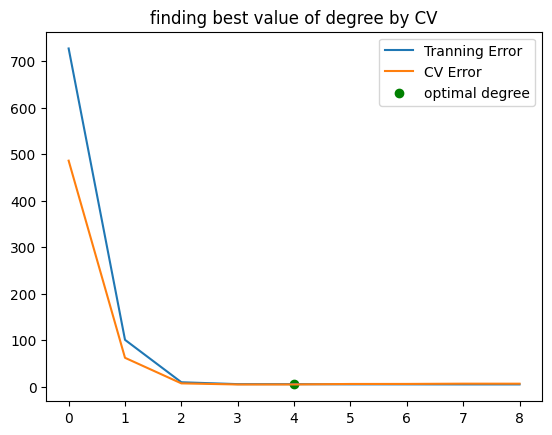

In [64]:
plt.plot(err_train, label = "Tranning Error")
plt.plot(err_cv, label = "CV Error")
plt.scatter(optimal_degree,err_cv[optimal_degree] , label = "optimal degree", marker = "o", color = "green")
plt.legend()
plt.title("finding best value of degree by CV")
plt.show()

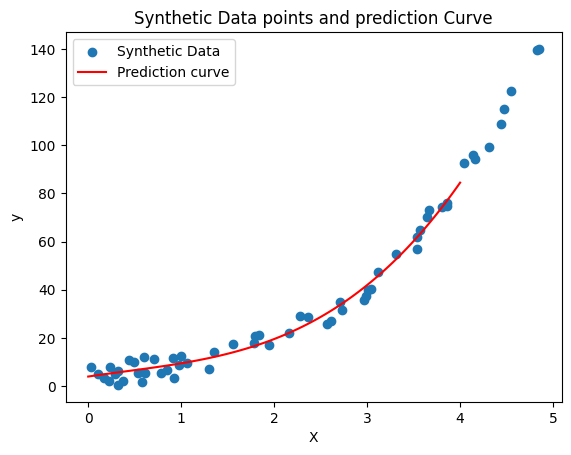

In [37]:
##plot the solution curve by the best degree
plt_train_test(X_train,y_train,x, y_pred[:,3])

# Tuning Regularization 

In [68]:
##using Regularization for minimizing the variance of the prediction
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
err_train = np.zeros(num_steps)
err_cv = np.zeros(num_steps)
degree = 10
x = np.linspace(0,int(X.max()),100).reshape(-1,1)
y_pred = np.zeros((100,num_steps))

for i in range(num_steps):
    lambda_ = lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train,y_train)
    yhat_train = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train,yhat_train)
    yhat_cv = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat_cv)
    y_pred[:,i] = lmodel.predict(x).reshape(-1,)
optimal_lambda_index= np.argmin(err_cv)  

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.29239e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.29239e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.29239e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.26878e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

In [69]:
print( f" the best lambda is at index {optimal_lambda_index} with lambda {lambda_range[optimal_lambda_index]}")

 the best lambda is at index 9 with lambda 100.0


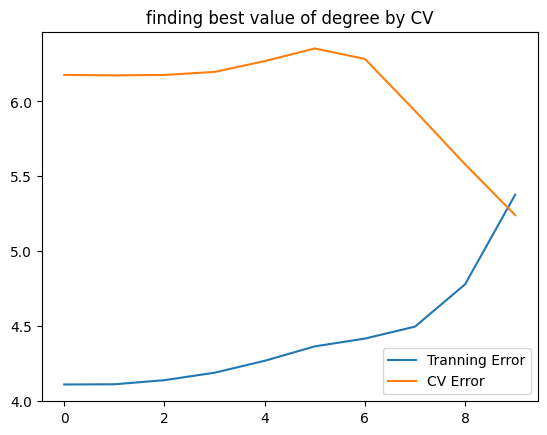

In [66]:
plt.plot(err_train, label = "Tranning Error")
plt.plot(err_cv, label = "CV Error")
plt.legend()
plt.title("finding best value of degree by CV")
plt.show()
##Above, the plots show that as regularization increases, 
##the model moves from a high variance (overfitting) model to a high bias (underfitting) model

#  Evaluating a Learning Algorithm (Neural Network)

In [71]:
X, y = load_data()
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (21000, 784) X_cv.shape: (16800, 784) X_test.shape: (4200, 784)


In [81]:
def eval_cat_err_v(y, yhat):
    incorret = np.sum(np.not_equal(y, yhat))
    return incorret/len(y)

In [84]:
##testing the eval if it works correct 
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err_v(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err_v(y_hat, y_tmp)):0.3f}, expected:0.250" )

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


# Model Complexity

In [85]:
## this is a complex model can overfit
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120,activation="relu"),
        Dense(40,activation="relu"),
        Dense(10,activation="linear")
    ], name="Complex"
)
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(lr=0.01),
)

In [88]:
model.fit(
    X_train, y_train,
    epochs=45
)

Epoch 1/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0473
Epoch 2/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0405
Epoch 3/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0354
Epoch 4/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0461
Epoch 5/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0505
Epoch 6/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0314
Epoch 7/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0394
Epoch 8/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0289
Epoch 9/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0425
Epoch 10/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0501
Epoch 11/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0341
Epoch 12/45
657/657 [==============================] - 2s 3ms/step - loss: 0.0390
Epoch 13/45
657/657 [====

In [ ]:
## we can use  regularization in tranning for handling the overfitting problem as discussed in the 
## above example with the simple data

tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(6,activation="linear"),
        ### START CODE HERE ### 
    ], name= "regularization_added"
)
model_r.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(lr=0.01),

)

In [ ]:
## we can train and check that the complex model has low bais than the simple one we trained earlier
## but has high variance as can be seen from cv loss
## and the regularization techinque will help in decresing the variance of the complex model 